# Playing with matrices

In [ ]:
https://github.com/juliacomputing/astartraining

Julia is a dynamic language.  You don't need type declarations, and can change variable types dynamically and interactively.

For working with simple numbers, arrays, and strings, its syntax is *superficially* similar to Matlab, Python, and other popular languages.

In order to execute the "In" cells, select the cell and press Shift-Enter, or press the Play button above. To run the entire notebook, navigate to Cell and then click Run All.

# We tell beginners, you don't need types!

In [ ]:
typeof(1.0)

In [ ]:
typeof(1)

In [ ]:
S = "Hello Julia Clsas"
typeof("S")

In [ ]:
#  Exercise fix my spelling in the cell above
S

# Now forget all that: Julia is not so different from your favorite dynamic language

In [ ]:
1+1

In [ ]:
 A = rand(5,5)

In [ ]:
round(A,2)

In [ ]:
round(A,2)*10

In [ ]:
A * inv(A)

In [ ]:
A = fill(0,5,5) # Fill a 5x5 array with 0's

In [ ]:
# Exercise: Fill a 3x10 array with 7's


# Let's create some addition tables

In [ ]:
# Create an addition table: Nested for loop
for i=1:5
    for j=1:5
        A[i,j] = i+j  # Square brackets for indices.  Also: indices start at 1, not 0.
    end
end

A

In [ ]:
# Create an addition table: "Double" for loop
for i=1:5, j=1:5
   A[i,j] = i+j  # Square brackets for indices.  Also: indices start at 1, not 0.
end

A

In [ ]:
# Create an addition table: the Julia favorite way

[i+j for i=1:5, j=1:5]

# Vocabulary word of the day: Comprehension  (other languges use "meshgrid")

In [ ]:
# Exercise and explore: What does this do?
[ i*100 for i in (1:7).^2]

# Exercise and explore: Explain this way to find numbers of the form x^2 + y^2 
sort(unique(x^2+y^2 for x in 1:5 ,y in 1:5))  # This is called a generator 

In [ ]:
# Suppose we want to see nxn addition tables for n=1,2,3,4,5
for n=1:5
    display([i*j for i=1:n,j=1:n])
end

# Interact is a "package" with the `@manipulate` "macro"

In [ ]:
# way more fun way to "interact" with data
using Interact # using loads a "package"

In [ ]:
@manipulate for n=1:1000
    n
end

In [ ]:
using Interact   # using loads a "package" 
@manipulate for n=1:20
    [i*j for i=1:n,j=1:n]
end

In [ ]:
#double slider!!  Put a 3x3 block of i's in an n x n matrix of zeros
@manipulate for n=3:10, i=1:9
   A = fill(0,n,n)
   A[1:3, 1:3] = i  
A
end

# Functions

In [ ]:
function f(x)
    x^2
end

In [ ]:
f(10)

In [ ]:
f(rand(3,3))

In [ ]:
function f(x, power=2)
    x^power
end

In [ ]:
f(7)

In [ ]:
f(10,3)

In [20]:
function insert_block(A, i, j, what=7)
    B = A[:,:]        # B is a copy of A       
    B[ i:i+2, j:j+2] = fill(what,3,3)
    B
end

insert_block (generic function with 2 methods)

In [ ]:
A = fill(0,9,9)
insert_block(A, 3, 5)

In [ ]:
A = fill(0,9,9)
insert_block(A, 3, 5, 2)  # Use 2 instead of 7

In [ ]:
A = fill(0,10,10)
n =size(A,1)
@manipulate for i in 1:n-2, j in 1:n-2
    insert_block(A, i,j)
end

# Strings

In [ ]:
S = "Hello"

In [ ]:
replace(S, "H", "J")

In [ ]:
string(S," ", S, " ","Julia")

More about strings: <a href="http://docs.julialang.org/en/stable/manual/strings/"> Julia Doc on Strings </a>

In [ ]:
A = fill("Julia",10,10)

In [ ]:
# Fancy string printing
function Base.show{T<:String}(io::IO, ::MIME"text/html", M::Matrix{T}) 
    max_length = maximum(length.(M))
    dv="<div style='display:flex;flex-direction:row'>"
    print(io, dv*join([join("<div style='width:40px; text-align:center'>".*M[i,:].*"</div>", " ") for i in 1:size(M, 1)]
            , "</div>$dv")*"</div>")
end

In [ ]:
A

In [ ]:
# Remember this ????
A = fill(0,10,10)
n = size(A,1)
@manipulate for i in 1:n-2, j in 1:n-2
    insert_block(A, i,j)
end

In [ ]:
A = fill("Julia",10,10)
n = size(A,1)
@manipulate for i in 1:n-2, j in 1:n-2
    insert_block(A, i,j, " [FUN]")
end

In [ ]:
@manipulate for i in 1:n-2, j in 1:n-2
    insert_block(A, i,j, "π")
end

In [ ]:
@manipulate for i in 1:n-2, j in 1:n-2
    insert_block(A, i,j, "♡")
end

In [ ]:
airplane = "✈"
alien = "👽"
rand( [airplane,alien],5,5)

In [ ]:
A = fill(airplane,9,9)
n=size(A,1)
@manipulate for i in 1:n-2, j in 1:n-2
    insert_block(A, i,j, alien)
end

# Colors

In [1]:
using Images, Colors

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/Images.ji for module Images.


In [2]:
distinguishable_colors(12)

In [3]:
@manipulate for n = 1:80
    distinguishable_colors(n)
end

LoadError: UndefVarError: @manipulate not defined

In [4]:
colors = distinguishable_colors(100)


In [5]:
# Remember this ????
A = fill(0,10,10)
n = size(A,1)
@manipulate for i in 1:n-2, j in 1:n-2
    insert_block(A, i,j)
end

LoadError: UndefVarError: @manipulate not defined

In [6]:
A = fill(colors[1],10,10)
n =size(A,1)
@manipulate for i in 1:n-2, j in 1:n-2
    insert_block(A, i,j,colors[4])
end

LoadError: UndefVarError: @manipulate not defined

In [7]:
# Exercise: Create Tetris Pieces, have them fall from the top

# Images

In [8]:
using Images

In [ ]:
download("https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singapore_Mini_Merlion.JPG/220px-Singapore_Mini_Merlion.JPG", "merlion.jpg")

In [9]:
julia_logo = load("julia_logo.png")
save("julia_logo.jpg", julia_logo)
julia_logo = load("julia_logo.jpg")

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/ImageMagick.ji for module ImageMagick.


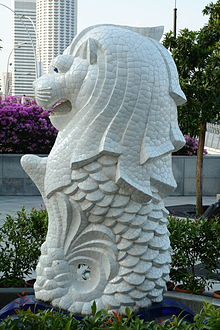

In [10]:
merlion = load("merlion.jpg")
#size(merlion)

In [11]:
download("https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Rear_view_of_the_Merlion_statue_at_Merlion_Park,_Singapore,_with_Marina_Bay_Sands_in_the_distance_-_20140307.jpg/250px-Rear_view_of_the_Merlion_statue_at_Merlion_Park,_Singapore,_with_Marina_Bay_Sands_in_the_distance_-_20140307.jpg", "merlion2.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12330  100 12330    0     0  12991      0 --:--:-- --:--:-- --:--:-- 12992


"merlion2.jpg"

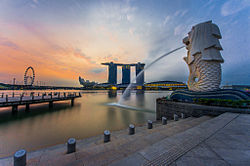

In [12]:
merlion2 = load("merlion2.jpg")

In [13]:
Base.getindex(I::Image,x::Range,y::Range) = getindexim(merlion,x,y)

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(50, nactions=1),"i",50,"50",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(68=>"68",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(50, nactions=1),"j",50,"50",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(68=>"68",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42"…)),Any[],Any[],true,"horizontal")

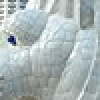

In [16]:
using Interact
@manipulate for i=1:100, j=1:100
     merlion[i + 1:100,j + 1:100]
end


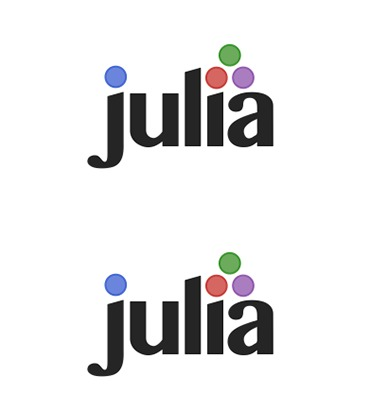

In [17]:
[julia_logo julia_logo ]

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(2, nactions=1),"i",2,"2",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4),Dict(4=>"4",2=>"2",3=>"3",1=>"1")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(2, nactions=1),"j",2,"2",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4),Dict(4=>"4",2=>"2",3=>"3",1=>"1")),Any[],Any[],true,"horizontal")

,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,

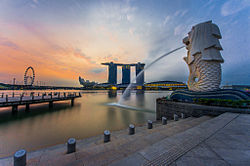
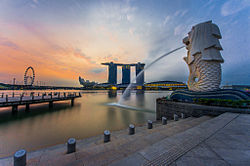
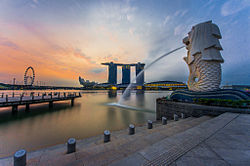
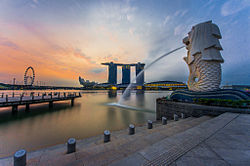
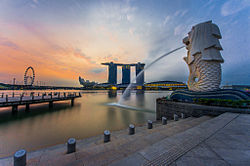
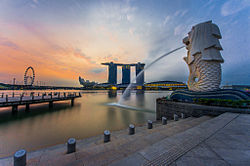
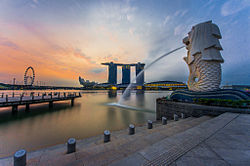
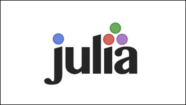
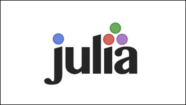
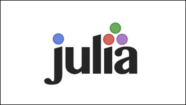
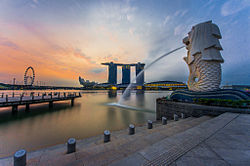
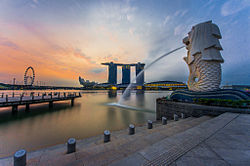
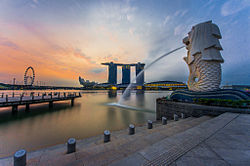
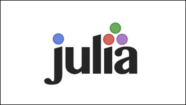
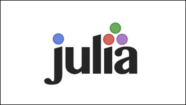
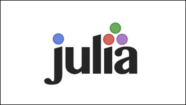
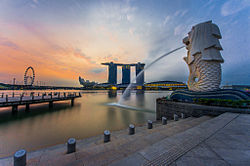
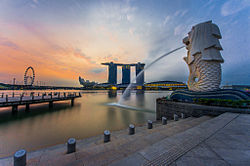
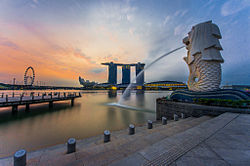
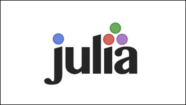
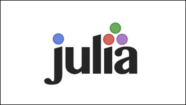
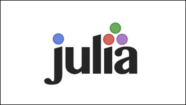
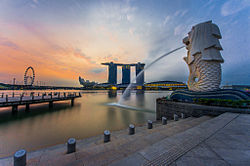
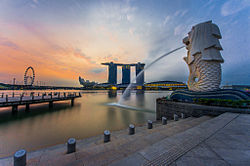
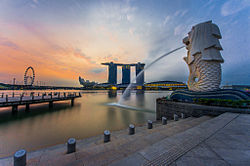
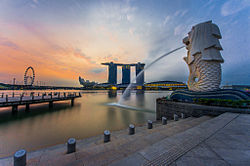
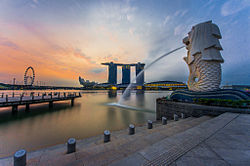
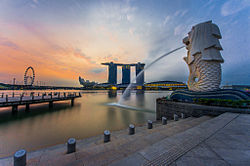
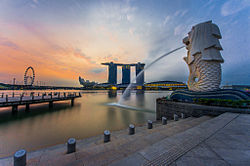
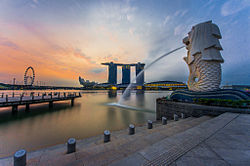
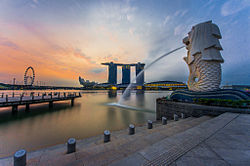
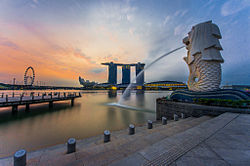
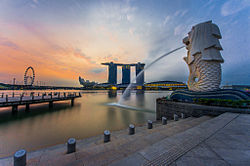
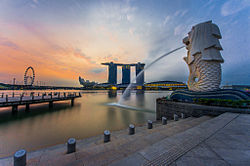
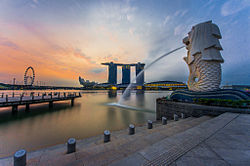
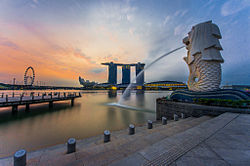

In [21]:
A = fill(merlion2,6,6)
n =size(A,1)
@manipulate for i in 1:n-2, j in 1:n-2
   insert_block(A, i,j,julia_logo)
end

# Moral:  We tell beginners, you don't need types!
# Later they tell us "we want to know".

In [22]:
typeof(1)

Int64

In [30]:
UInt8(16)

0x10

In [31]:
FixedPointNumbers.UFixed8(0.5)

UFixed{UInt8,8}(0.502)

In [32]:
128/255

0.5019607843137255

In [33]:
colors[10].r

UFixed{UInt8,8}(0.655)

In [34]:
typeof(colors[10])

ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}}

In [35]:
typeof(merlion)

Images.Image{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2,Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2}}

# Think of the above as elements, now put them in arrays

In [37]:
typeof(fill( 1, 8, 8))
typeof(fill(1,3,3,3))

Array{Int64,3}

In [39]:
airplane = "airplane"
typeof( fill(airplane, 8, 8))

Array{String,2}

In [40]:
typeof(fill(colors[1],8,8))

Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2}

In [41]:
typeof(fill(merlion,8,8))



Array{Images.Image{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2,Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2}},2}

In [42]:
A = fill(1,8,8)
typeof(insert_block(A, 3, 5))

Array{Int64,2}

In [44]:
alien ="alien"
A = fill(airplane,8,8)
typeof(insert_block(A, 3, 5,alien))

Array{String,2}

In [45]:
A = fill(colors[1],8,8)
typeof(insert_block(A,3,5,colors[2]))

Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2}

In [46]:
A = fill(merlion,8,8)
typeof(insert_block(A, 3, 5, merlion))

Array{Images.Image{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2,Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2}},2}